# XGBoost vs. LightGBM
- In XGBoost, trees grow depth-wise while in LightGBM, trees grow leaf-wise which is the fundamental difference between the two frameworks.

## 1. Installing libraries

In [19]:
import numpy as np
import seaborn as sns
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
import pandas as pd
 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, balanced_accuracy_score
from sklearn.datasets import make_classification

## 2. Comparison of gradient boosted trees

In [18]:
sample_sizes = np.array([1000, 5000, 10000, 20000])
data = []

for samples in sample_sizes:
    # Creating dataset
    dummy = make_classification(n_samples=samples)
    
    # splitting the data into train and test set using Stratified fold
    X_train, X_test, y_train, y_test = train_test_split(dummy[0],
                                                        dummy[1],
                                                        test_size=0.2,
                                                        stratify=dummy[1])
    # Fitting XGBoost 
    xgb_dummy = XGBClassifier(seed=47, tree_method='hist')
    xgb_dummy.fit(X_train, y_train)
    lgbm_dummy = LGBMClassifier(random_state=47)
    lgbm_dummy.fit(X_train, y_train)
    
    # Testing
    data.append(['XGBoost', samples, balanced_accuracy_score(y_test, xgb_dummy.predict(X_test)), accuracy_score(y_test, xgb_dummy.predict(X_test))])
    data.append(['LightGBM', samples, balanced_accuracy_score(y_test, lgbm_dummy.predict(X_test)), accuracy_score(y_test, lgbm_dummy.predict(X_test))])
    
results = pd.DataFrame(data, columns=['Algo', 'samples', 'balanced_accuracy', 'accuracy'])

## 3. Plotting

Text(0.5, 0.98, 'Metrics')

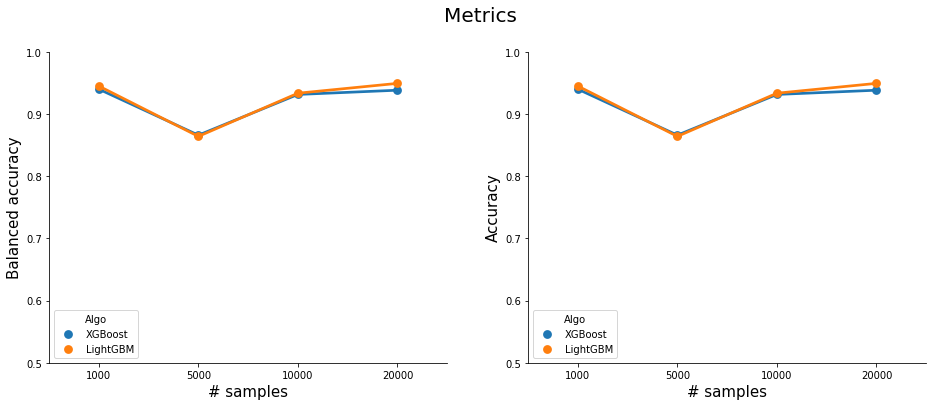

In [27]:
fig, ax = plt.subplots(1,2,figsize=(14,6))
fig.tight_layout(pad=5)
ax = ax.ravel()

features = ['balanced_accuracy', 'accuracy']
labels = {features[0]: 'Balanced accuracy', features[1]: 'Accuracy'}
for f, feature in enumerate(features):
    ax[f] = sns.pointplot(x='samples', y='balanced_accuracy', data=results, hue='Algo', ax = ax[f])
    ax[f].set_ylim(0.5, 1.0)
    ax[f].set_xlabel('# samples', fontsize=15)
    ax[f].set_ylabel(labels[feature], fontsize=15)
    ax[f].spines['right'].set_visible(False)
    ax[f].spines['top'].set_visible(False)
    
fig.suptitle('Metrics', fontsize=20)